# Práctica 3

## Integrantes:


- García Saavedra Armando
- Mejía Yañez José Ehecatl
- Rodriguez Nuñez Diego Eduardo

### Introducción



El algoritmo para encontrar el máximo y mínimo elemento de un arreglo por el método iterativo consiste en recorrer el arreglo elemento por elemento, y en cada paso comparar el valor actual con el valor máximo y mínimo encontrados hasta ese momento. Inicialmente, se establece el valor máximo como el primer elemento del arreglo y el valor mínimo como el mismo.

A continuación, se realiza un bucle que recorre el arreglo desde el segundo elemento hasta el último. En cada iteración, se compara el valor actual del arreglo con el valor máximo y mínimo actual, y se actualiza el valor máximo o mínimo si el valor actual es mayor o menor, respectivamente.

Al finalizar el bucle, se habrá encontrado el valor máximo y mínimo del arreglo.

El algoritmo para encontrar el máximo y mínimo elemento de un arreglo usando la estrategia "divide y vencerás" se puede implementar de la siguiente manera:

- Dividir el arreglo en dos partes iguales.
- Encontrar el máximo y mínimo elemento de cada una de las partes recursivamente, utilizando el mismo algoritmo.
- Comparar los máximos y mínimos de ambas partes para obtener el máximo y mínimo del arreglo completo.

Este enfoque utiliza la técnica de "dividir y vencer" para reducir el tamaño del problema a la mitad en cada iteración. Al dividir el arreglo en dos partes, el algoritmo realiza la tarea de encontrar el máximo y mínimo en cada mitad de forma independiente y recursiva.

Una vez que se ha encontrado el máximo y mínimo de cada mitad, se realiza una comparación para determinar el máximo y mínimo del arreglo completo.

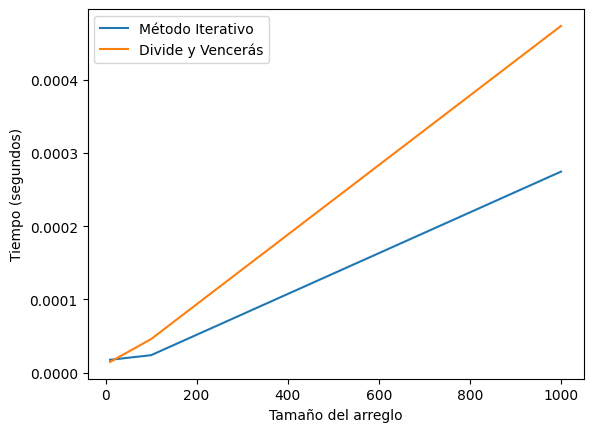

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit 
from sympy import *

def MaxMinIterativo(A):
    Max = A[0]
    Min = A[0]
    for i in range(1, len(A)):
        if A[i] > Max:
            Max = A[i]
        elif A[i] < Min:
            Min = A[i]
    return (Max, Min)

def MaxMinDV(i, j, Max, Min, A):
    if i < j-1:
        mit = (i+j) // 2
        Max1, Min1 = MaxMinDV(i, mit, Max, Min, A)
        Max2, Min2 = MaxMinDV(mit+1, j, Max, Min, A)

        if Max1 > Max2:
            Max = Max1
        else:
            Max = Max2

        if Min1 < Min2:
            Min = Min1
        else:
            Min = Min2
    else:
        if i == j-1:
            if A[i] > A[j]:
                Max = A[i]
                Min = A[j]
            else:
                Max = A[j]
                Min = A[i]
        else:
            Max = A[j]
            Min = A[i]

    return Max, Min

tams = [10, 100, 1000]
iterativo_tiempos = []
DV_tiempos = []
for tam in tams:
    arr = np.random.randint(0, 100000, tam)
    iterativo_t = timeit.timeit('MaxMinIterativo(arr)', number=1, globals=globals())
    DV_t = timeit.timeit('MaxMinDV(0, len(arr)-1, arr[0], arr[0], arr)', number=1, globals=globals())
    iterativo_tiempos.append(iterativo_t)
    DV_tiempos.append(DV_t)
    '''print(f"Tiempo para tamaño {tam}:")
    print(f"Iterativo: {iterativo_t:.10f}")
    print(f"Divida y Venceras: {DV_t:.10f}")'''


plt.plot(tams, iterativo_tiempos, label='Método Iterativo')
plt.plot(tams, DV_tiempos, label='Divide y Vencerás')
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.show()

### Las ecuaciones de recurrencia son las siguientes:

In [2]:
init_printing()
n = symbols('n', integer=True)
T_iter = Eq(Function('T_iterativa')(n), Function('T')(n-1) + 2)
T_DV = Eq(Function('T_DV')(n), 2*Function('T')(n/2) + 2)
display(T_iter, T_DV)


### Conclusiones